<a href="https://colab.research.google.com/github/trissentety/Python-Machine-Learning/blob/main/FCC_Bikes_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

In [72]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "raidiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)

In [73]:
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12] #hour is only = to 12
df = df.drop(["hour"], axis=1)

In [74]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,raidiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


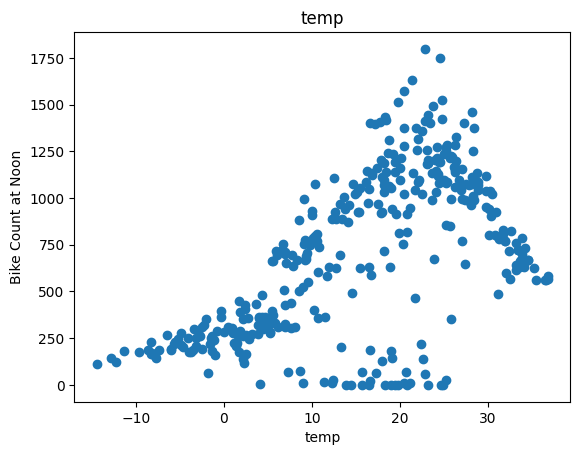

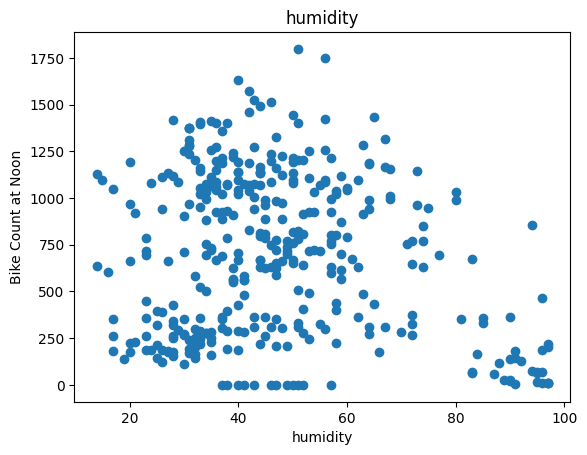

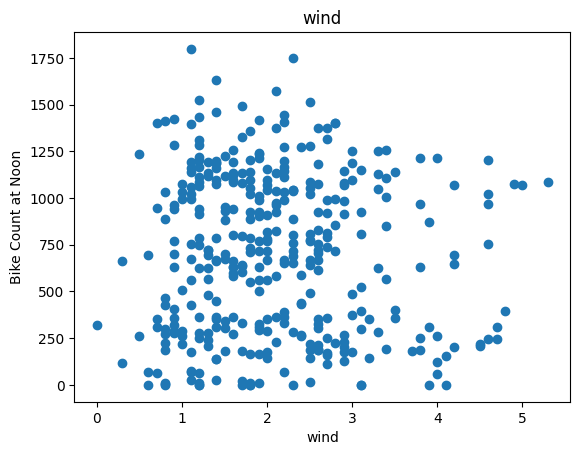

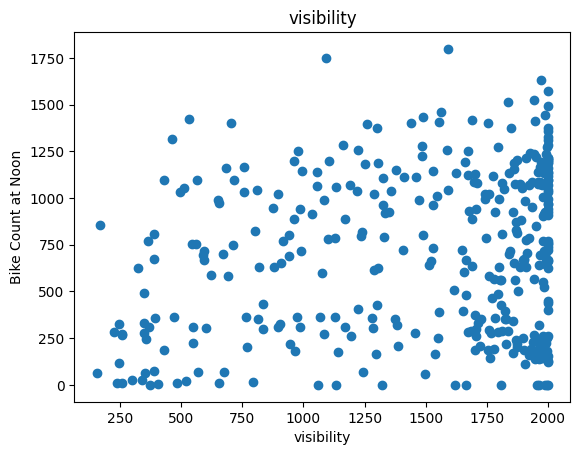

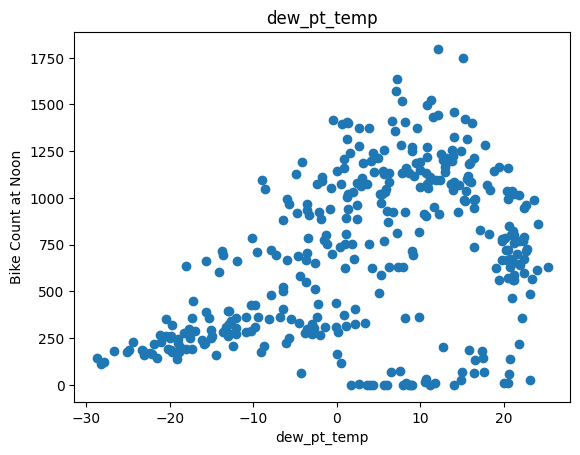

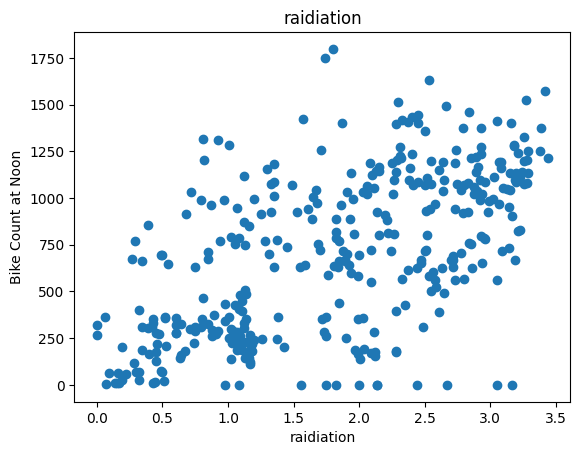

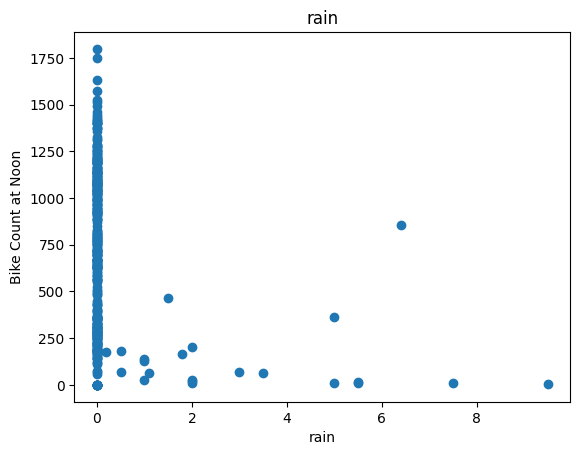

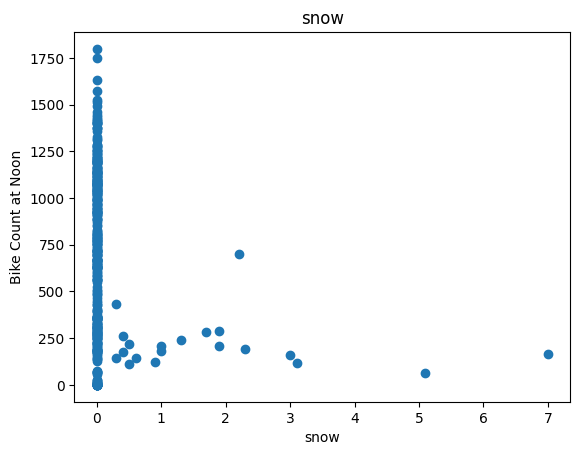

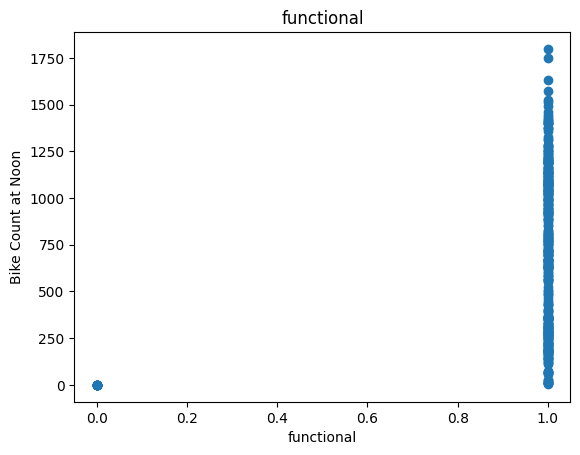

In [75]:
for label in df.columns[1:]: #temperature and onwards
  plt.scatter(df[label], df["bike_count"]) #y axis is bike count, label on x axis
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()

Dropping columns that show no relational interest

In [76]:
df = df.drop(["wind", "visibility", "functional"], axis=1) #drop column

In [77]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,raidiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


#Split into Train / Valid / Test Dataset

In [78]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))]) #sample and splits of df

In [79]:
def get_xy(dataframe, y_label, x_labels=None): #if none then get everything from dataset that's not wildlife
  dataframe = copy.deepcopy(dataframe) #copy everything over
  #if x_labels is None, extracting x
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values #take all columns values
  else: #if there is x_labels
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else: #list of specific x_labels
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1) #make it 2d for hstack
  data = np.hstack((X, y)) #stack horizontal next to eachother

  return data, X, y




In [80]:
#_ for full grid or full array. tran val and test for temp
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"]) #df changed to train, y label bike count, x labels temp 1d because temp does really well
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"]) #df above, y label bike count, x labels temp 1d because temp does really well
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"]) #df above, y label bike count, x labels temp 1d because temp does really well

In [81]:
X_train_temp

array([[14.9],
       [16.8],
       [ 5.3],
       [22.9],
       [-1. ],
       [26.2],
       [ 2.5],
       [21.9],
       [12.8],
       [-2. ],
       [-3.5],
       [ 4. ],
       [27. ],
       [ 1.1],
       [31.1],
       [ 1.4],
       [ 5.9],
       [32.4],
       [16.5],
       [25.8],
       [19.4],
       [24.2],
       [ 2.2],
       [19.5],
       [27. ],
       [ 5.3],
       [16.6],
       [18.2],
       [27.9],
       [17.2],
       [16.7],
       [20.1],
       [15.1],
       [22.1],
       [ 2.9],
       [15.2],
       [33.4],
       [13.2],
       [22.9],
       [15.5],
       [ 5.5],
       [29.8],
       [ 2.2],
       [24.9],
       [ 4.8],
       [24.7],
       [ 6.9],
       [16.2],
       [-4.9],
       [ 9.2],
       [25. ],
       [13.7],
       [13.3],
       [36.8],
       [ 5.5],
       [10. ],
       [ 0. ],
       [29.8],
       [24.3],
       [29.8],
       [-6. ],
       [ 9.1],
       [ 1.2],
       [30.1],
       [24.3],
       [11.9],
       [17

In [82]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

Coefficient and X intercept

In [96]:
#print(temp_reg.ceof_, temp_reg.intercept_)

R squared score

In [85]:
temp_reg.score(X_test_temp, y_test_temp)

0.311612606939883

1d plot

Text(0.5, 0, 'Temp')

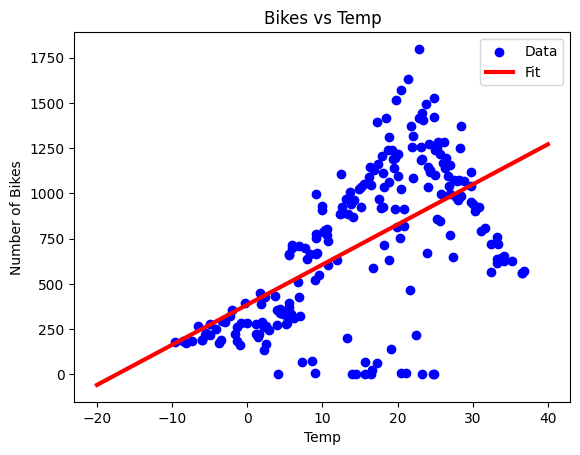

In [86]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100) #x range, 100 things from data -20 to 40
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")


#Multiple Linear Regression

In [87]:
#_ for full grid or full array. tran val and test for temp
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

In [88]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [89]:
all_reg.score(X_test_all, y_test_all)

0.4270325879588762

In [124]:
y_pred_lr = all_reg.predict(X_test_all) #predictions using linear regressor

In [91]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [92]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [93]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1) #1 node means linear and ouput linear
])

In [94]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [95]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp, y_val_temp)
)

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 4ms/step


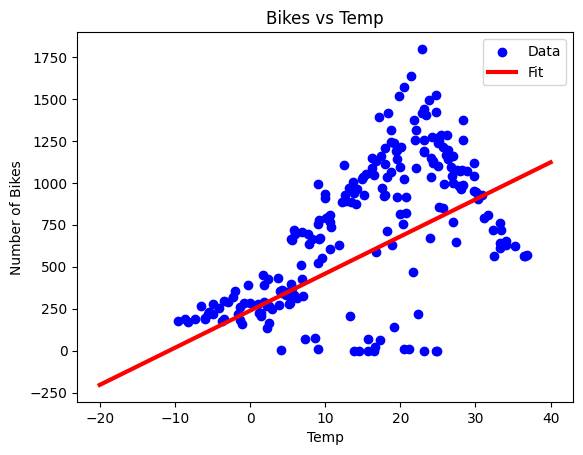

In [107]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100) #x range, 100 things from data -20 to 40
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3) #nn regressor this time
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

#Neural Net

In [113]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'), #32 unites
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1), #relu because can't have less than zero bytes
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [114]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp, y_val_temp),
    verbose=0, epochs=100
)

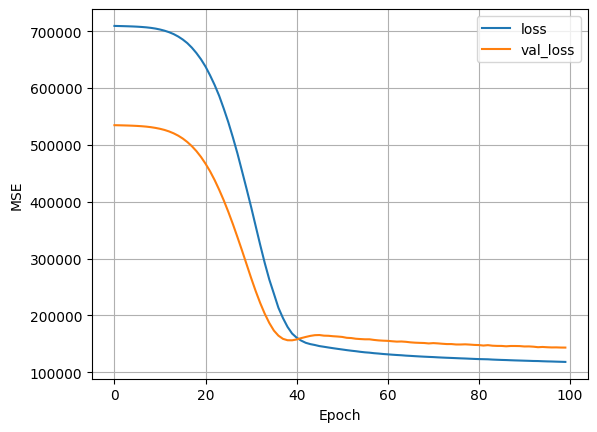

In [115]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


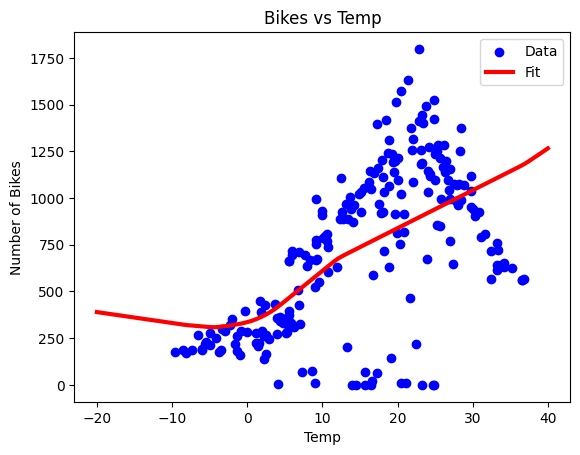

In [116]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100) #x range, 100 things from data -20 to 40
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3) #nn regressor this time
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()
#Linear regression doesn't see this curve

In [130]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=1)
all_normalizer.adapt(X_train_all)


In [131]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'), #32 unites
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1), #relu because can't have less than zero bytes
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [132]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)

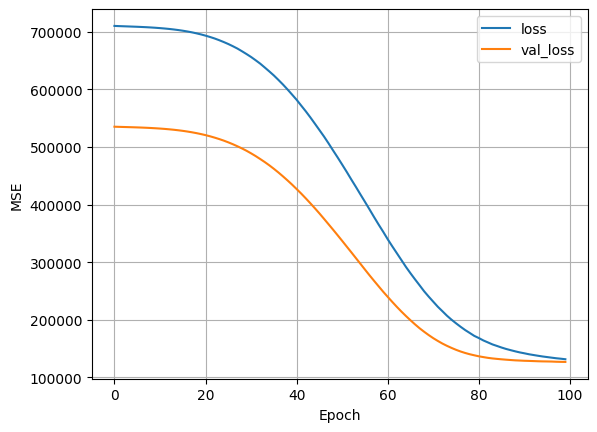

In [133]:
plot_loss(history)

In [134]:
#calculate the Mean squared error (MSE) for both linear regressor and neural net (nn)
y_pred_lr = all_reg.predict(X_test_all) #predictions using linear regressor
y_pred_nn = nn_model.predict(X_test_all) #neural net

3/3 [==============================] - 0s 4ms/step


In [135]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean() #y_pred - y_real squares it

In [136]:
MSE(y_pred_lr, y_test_all)

97726.49568743283

In [137]:
MSE(y_pred_nn, y_test_all)

123276.08728997335

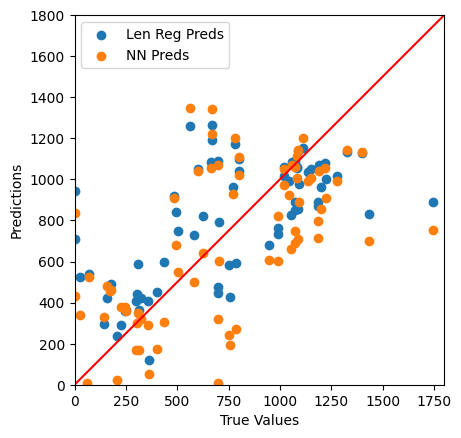

In [141]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Len Reg Preds") #y values on y axis, y predictions on x axis
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800] #limits for max number of bytes
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")